In [1]:
install.packages("keras")

Installing package into 'C:/Users/HP/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'keras' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpYntEMo\downloaded_packages


In [3]:
library(keras)
install_keras()

print("Keras successfully installed")

Using Python: C:/Users/HP/anaconda3/python.exe
Creating virtual environment "r-tensorflow" ... 


+ "C:/Users/HP/anaconda3/python.exe" -m venv "C:\Users\HP\OneDrive - Nexford University\Documents/.virtualenvs/r-tensorflow"



Done!
Installing packages: pip, wheel, setuptools


+ "C:\Users\HP\OneDrive - Nexford University\Documents/.virtualenvs/r-tensorflow/Scripts/python.exe" -m pip install --upgrade pip wheel setuptools



Virtual environment 'r-tensorflow' successfully created.
Using virtual environment "r-tensorflow" ...


+ "C:\Users\HP\OneDrive - Nexford University\Documents/.virtualenvs/r-tensorflow/Scripts/python.exe" -m pip install --upgrade --no-user "tensorflow==2.15.*" tensorflow-hub tensorflow-datasets scipy requests Pillow h5py pandas pydot




Installation complete.

[1] "Keras successfully installed"


In [5]:
# Step 1: Load the libraries
library(keras)
library(ggplot2) # For plotting, if desired beyond base R plots

print("Libraries loaded successfully.")

[1] "Libraries loaded successfully."


[1] "\n--- Step 2: Load the Dataset ---"
Training images dimensions: 60000 28 28 
Training labels dimensions: 60000 
Test images dimensions: 10000 28 28 
Test labels dimensions: 10000 
Number of classes: 10 


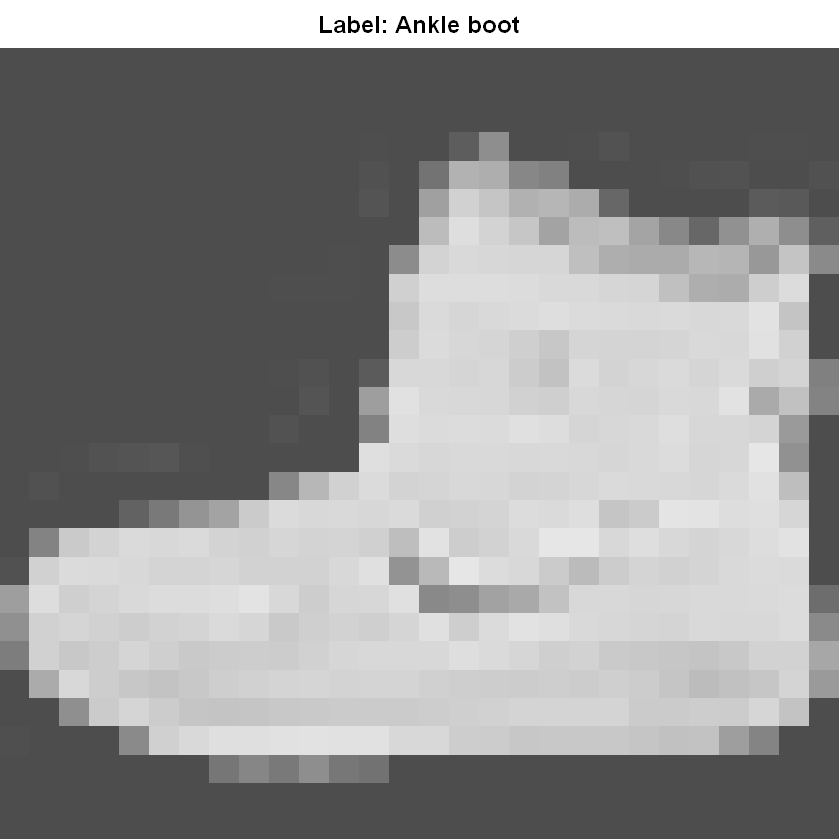

In [13]:
# Step 2: Load the dataset
print("\n--- Step 2: Load the Dataset ---")

fashion_mnist <- dataset_fashion_mnist()
c(train_images, train_labels) %<-% fashion_mnist$train
c(test_images, test_labels) %<-% fashion_mnist$test

# Define class names for better interpretability
class_names <- c('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

cat("Training images dimensions:", dim(train_images), "\n")
cat("Training labels dimensions:", dim(train_labels), "\n")
cat("Test images dimensions:", dim(test_images), "\n")
cat("Test labels dimensions:", dim(test_labels), "\n")
cat("Number of classes:", length(class_names), "\n")

# Display a sample image and label (R-specific plotting)
par(mar=c(0,0,2,0)) # Adjust margins
image(t(apply(train_images[1,,], 2, rev)), col = gray.colors(256),
      axes = FALSE, main = paste("Label:", class_names[train_labels[1] + 1])) # +1 because R is 1-indexed


[1] "\n--- Step 3: Data Pre-processing ---"
Normalized train images dimensions: 60000 28 28 1 
Normalized test images dimensions: 10000 28 28 1 
One-hot encoded train labels dimensions: 60000 10 
One-hot encoded test labels dimensions: 10000 10 
[1] "Process Completed"


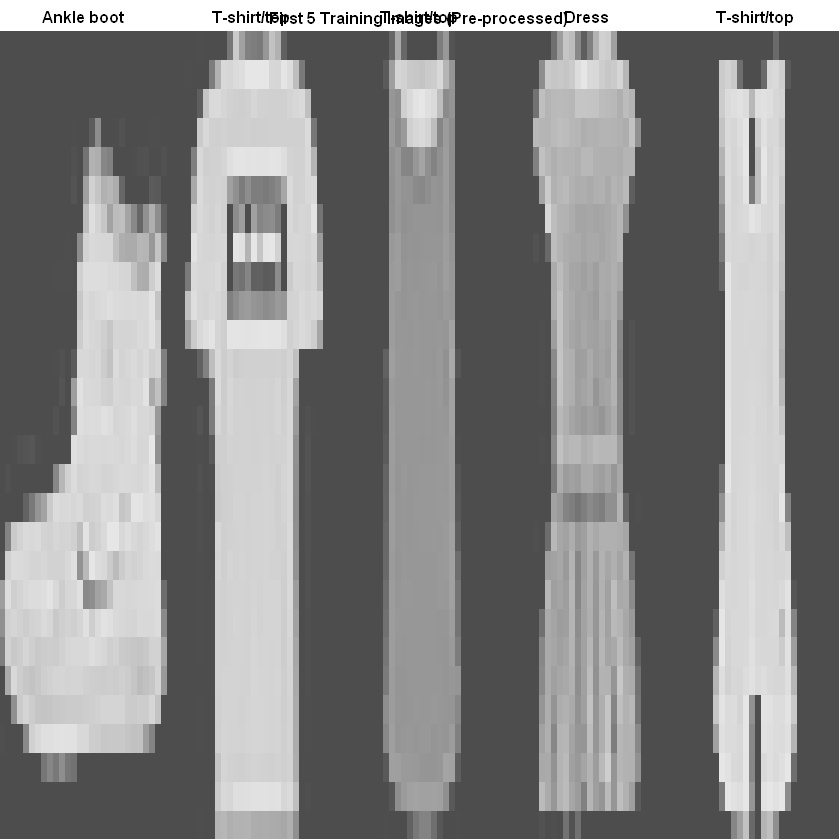

In [9]:
# Step 3: Data Pre-processing
print("\n--- Step 3: Data Pre-processing ---")

# Normalize pixel values
train_images <- train_images / 255
test_images <- test_images / 255

# Reshape images for CNN input: Keras in R expects (height, width, channels, batch_size)
# Original R dimensions are (width, height, channels) * number of images
# We need to add a channel dimension if not present and transpose for Keras
train_images <- array_reshape(train_images, c(dim(train_images)[1], 28, 28, 1))
test_images <- array_reshape(test_images, c(dim(test_images)[1], 28, 28, 1))

# Convert labels to one-hot encoding
train_labels_one_hot <- to_categorical(train_labels, num_classes = 10)
test_labels_one_hot <- to_categorical(test_labels, num_classes = 10)

cat("Normalized train images dimensions:", dim(train_images), "\n")
cat("Normalized test images dimensions:", dim(test_images), "\n")
cat("One-hot encoded train labels dimensions:", dim(train_labels_one_hot), "\n")
cat("One-hot encoded test labels dimensions:", dim(test_labels_one_hot), "\n")

# Display first 5 pre-processed images
par(mfrow=c(1,5), mar=c(0,0,2,0))
for (i in 1:5) {
  image(t(apply(train_images[i,,,], 2, rev)), col = gray.colors(256),
        axes = FALSE, main = class_names[which.max(train_labels_one_hot[i,])])
}
title(main="First 5 Training Images (Pre-processed)", line = -1.5, outer = TRUE, cex.main = 1.2)

print("Process Completed")

In [15]:
# Step 4: Create the model
print("\n--- Step 4: Create the Model ---")

model <- keras_model_sequential()
print("Sequential model created.")

[1] "\n--- Step 4: Create the Model ---"
[1] "Sequential model created."


In [17]:
# Step 5: Add layers
print("\n--- Step 5: Add Layers ---")

model %>%
  # Layer 1: Convolutional Layer
  # Filters: 32 feature detectors
  # Kernel size: 3x3
  # Activation: ReLU
  # Input Shape: (28, 28, 1) for grayscale 28x28 images
  layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = 'relu', input_shape = c(28, 28, 1)) %>%

  # Layer 2: Max Pooling Layer
  # Pool size: 2x2. Reduces spatial dimensions.
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%

  # Layer 3: Second Convolutional Layer
  # Filters: 64, often increasing filters in deeper layers
  layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = 'relu') %>%

  # Layer 4: Second Max Pooling Layer
  layer_max_pooling_2d(pool_size = c(2, 2)) %>%

  # Layer 5: Flatten Layer
  # Flattens the 2D output of the convolutional/pooling layers into a 1D vector
  layer_flatten() %>%

  # Layer 6: Dense Output Layer
  # Units: 10 (one for each class)
  # Activation: Softmax for multi-class classification, outputs probabilities for each class
  layer_dense(units = 10, activation = 'softmax')

print("CNN model architecture defined with 6 layers.")
summary(model)

[1] "\n--- Step 5: Add Layers ---"
[1] "CNN model architecture defined with 6 layers."
Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_1 (Conv2D)                  (None, 26, 26, 32)              320         
 max_pooling2d_1 (MaxPooling2D)     (None, 13, 13, 32)              0           
 conv2d (Conv2D)                    (None, 11, 11, 64)              18496       
 max_pooling2d (MaxPooling2D)       (None, 5, 5, 64)                0           
 flatten (Flatten)                  (None, 1600)                    0           
 dense (Dense)                      (None, 10)                      16010       
Total params: 34826 (136.04 KB)
Trainable params: 34826 (136.04 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


[1] "\n--- Step 6: Compile and Train the Model ---"
[1] "Model compiled. Training..."
[1] "\nModel training complete."
[1] "\n--- Evaluating Model on Test Data ---"
Test accuracy: 0.8742
Test loss: 0.3774


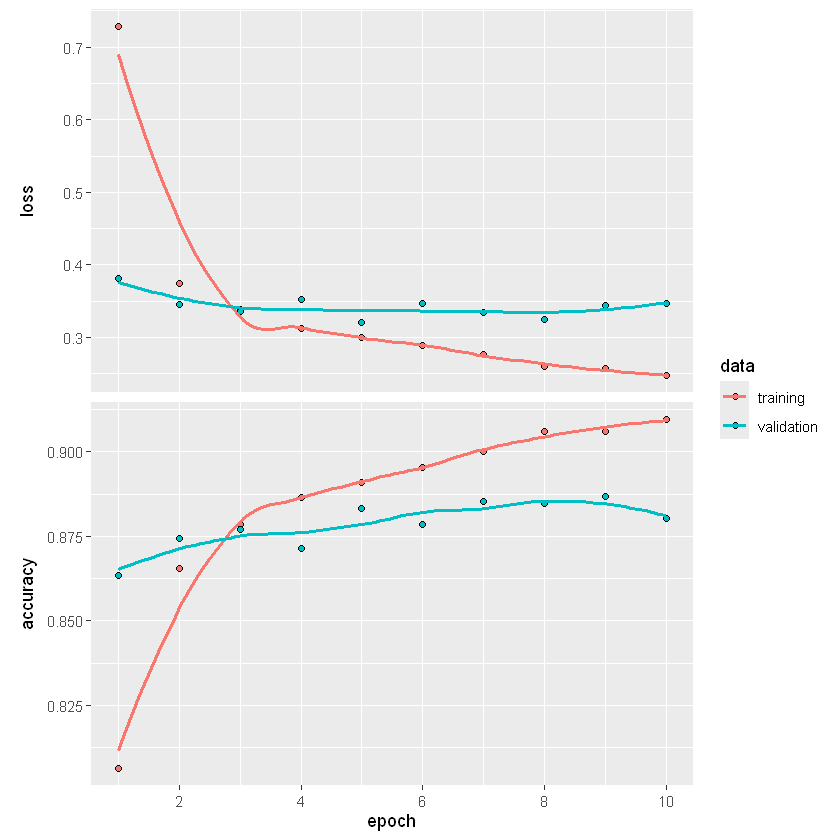

In [19]:
# Step 6: Compile and Train the Model
print("\n--- Step 6: Compile and Train the Model ---")

# Compile the model
model %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = c('accuracy')
)

print("Model compiled. Training...")

# Train the model
# epochs: Number of times the model will iterate over the entire training dataset.
# batch_size: Number of samples per gradient update. (Default is often 32)
# validation_split: A portion of the training data to be used as validation data.
history <- model %>% fit(
  train_images,
  train_labels_one_hot,
  epochs = 10,
  validation_split = 0.1
)

print("\nModel training complete.")

# Evaluate the model on the test data
print("\n--- Evaluating Model on Test Data ---")
eval_results <- model %>% evaluate(test_images, test_labels_one_hot, verbose = 0)
cat(sprintf("Test accuracy: %.4f\n", eval_results["accuracy"]))
cat(sprintf("Test loss: %.4f\n", eval_results["loss"]))

# Plot training & validation accuracy and loss
plot(history)

[1] "\n--- Making Predictions ---"
[1] "Dimensions of test_images before loop: 10000 28 28"
[1] "Dimensions of img_for_plot (inside loop): 28 28"
[1] "Dimensions of img_for_plot (inside loop): 28 28"
[1] "\nPredictions complete for selected test images."


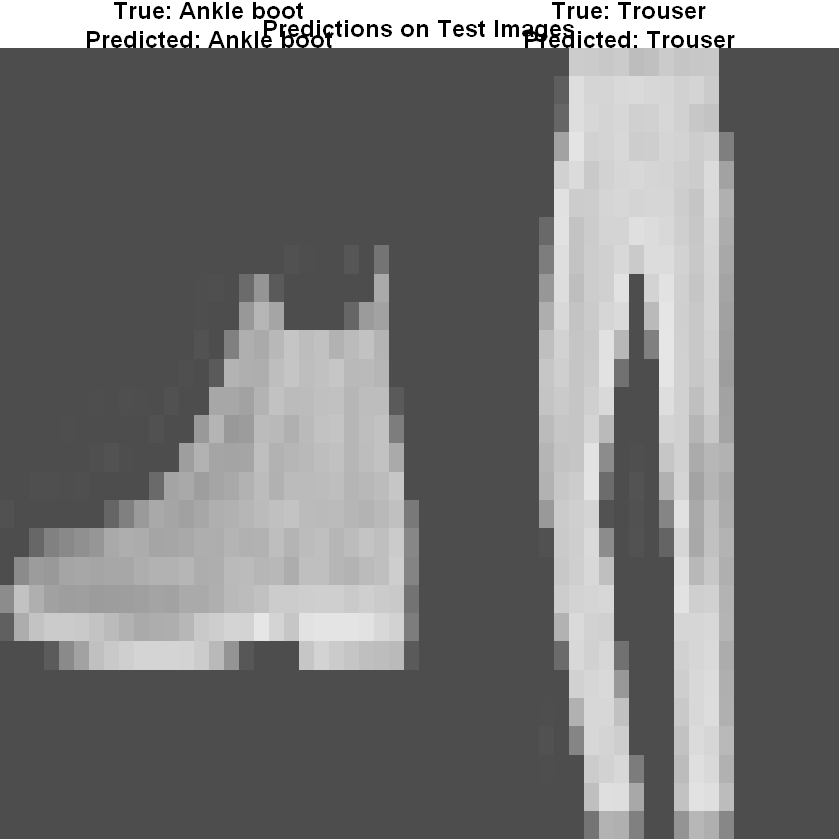

In [31]:
print("\n--- Making Predictions ---")

# Selecting at least two images from the test set for prediction
image_indices <- c(1, 6) # R is 1-indexed

print(paste("Dimensions of test_images before loop:", paste(dim(test_images), collapse = " ")))

par(mfrow=c(1, length(image_indices)), mar=c(0,0,2,0)) # Setup plot grid

for (i in 1:length(image_indices)) {
  img_idx <- image_indices[i]

  # Get the image and its true label
  # IMPORTANT: For prediction, the model still needs a 4D input (1, 28, 28, 1).
  # So, we need to reshape the 3D test_images slice for prediction.
  img_for_prediction <- array_reshape(test_images[img_idx, , ], c(1, 28, 28, 1))

  true_label <- test_labels[img_idx]

  # Then we make a prediction
  predictions <- model %>% predict(img_for_prediction)
  predicted_label <- which.max(predictions[1,]) # Get the class with the highest probability

  # We directly extract the 2D (28x28) image array for plotting from test_images (which is 3D)
  img_for_plot <- test_images[img_idx, , ] # This will correctly get a 28x28 matrix

  print(paste("Dimensions of img_for_plot (inside loop):", paste(dim(img_for_plot), collapse = " ")))

  # Plot the image and prediction
  image(t(apply(img_for_plot, 2, rev)), col = gray.colors(256),
        axes = FALSE, main = paste0("True: ", class_names[true_label + 1], "\n",
                      "Predicted: ", class_names[predicted_label]))
}

title(main="Predictions on Test Images", line = -1.5, outer = TRUE, cex.main = 1.2)

print("\nPredictions complete for selected test images.")